# Data Science Work Prompt - Aditya Kingrani


Import the necessary Libraries


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [112]:
# Set style for plots
plt.style.use('ggplot')  
colors = ['#440154', '#30678D', '#35B778', '#FDE724'] 
sns.set_palette(colors)

Exploring the data 

In [114]:
df = pd.read_csv('Data.csv')
df.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [116]:
df.shape

(100, 7)

Checking for null and duplicate values

In [118]:
df.isnull().sum()

User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64

In [119]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [120]:
df = df.drop_duplicates()

Data Visualizations

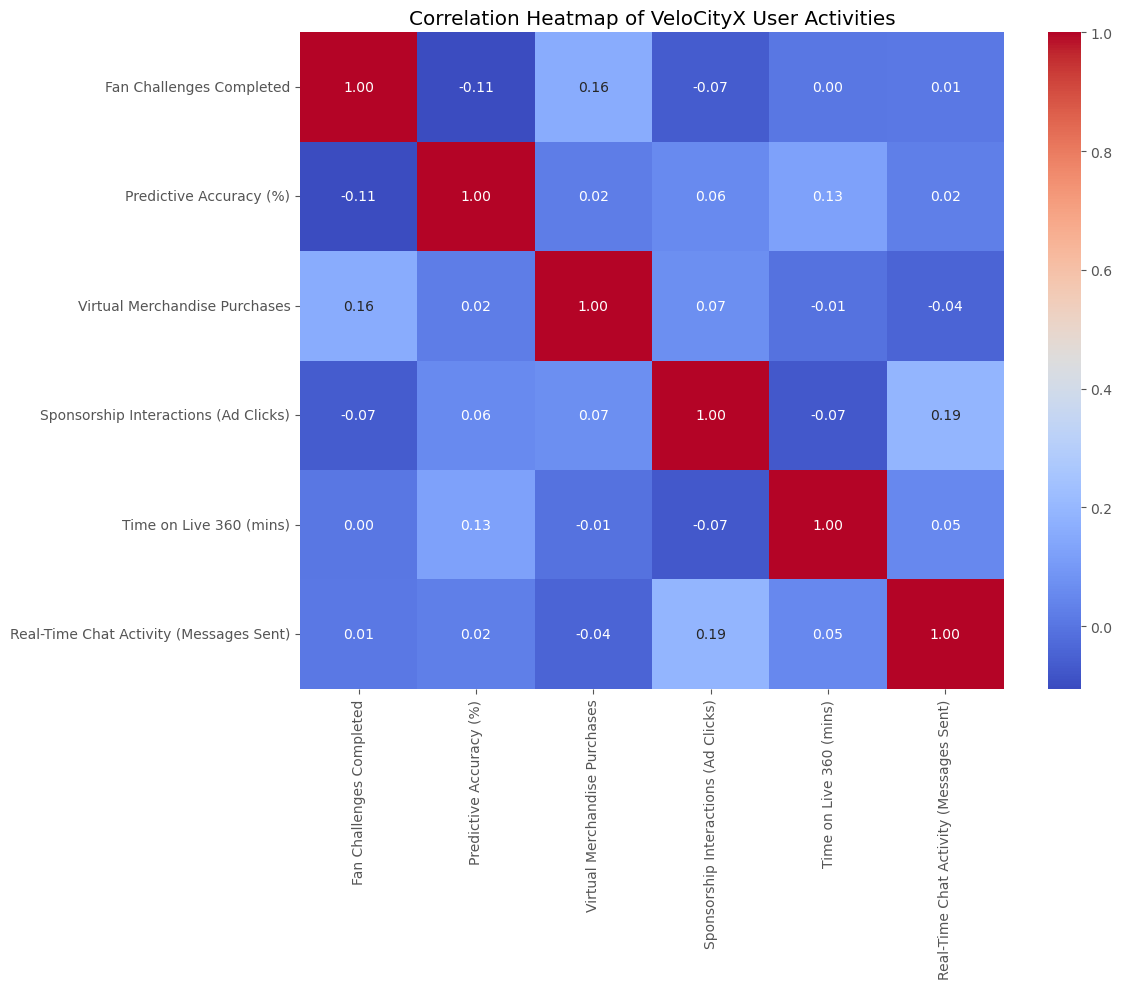

In [122]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of VeloCityX User Activities')
plt.tight_layout()
plt.show()

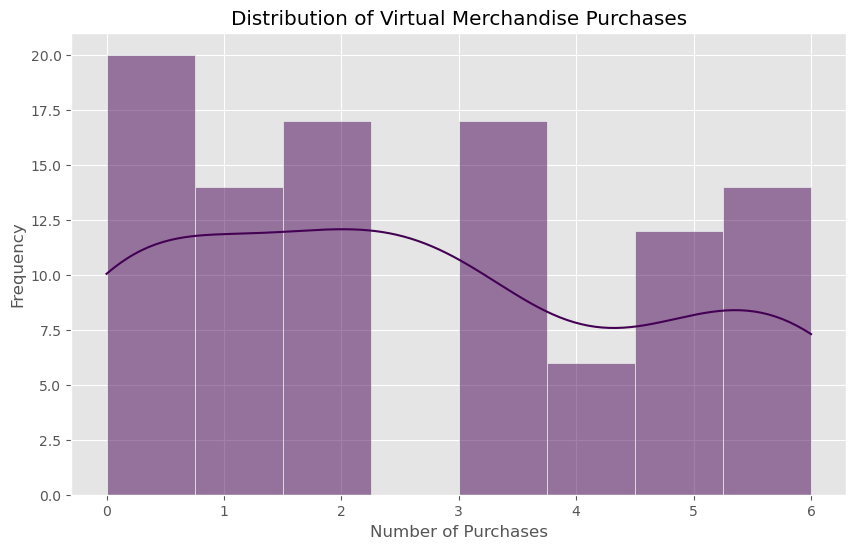

In [123]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Virtual Merchandise Purchases'], kde=True)
plt.title('Distribution of Virtual Merchandise Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()

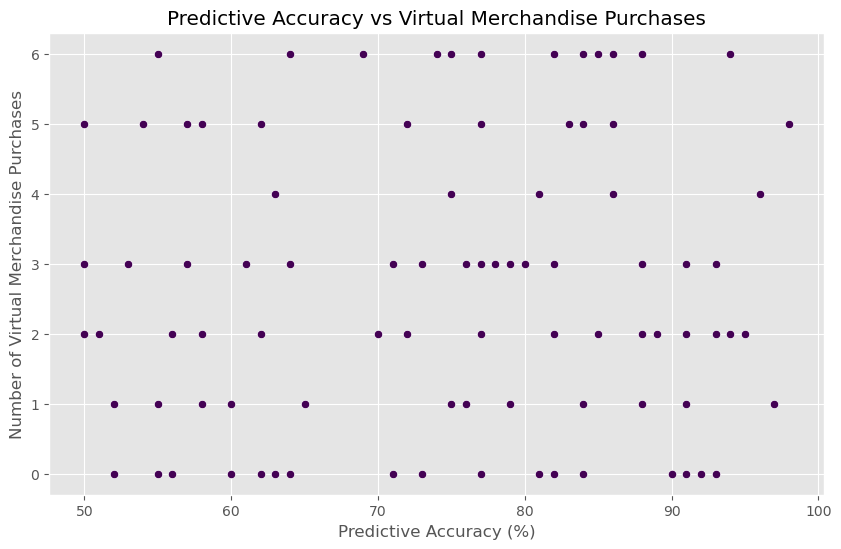

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predictive Accuracy (%)', y='Virtual Merchandise Purchases', data=df)
plt.title('Predictive Accuracy vs Virtual Merchandise Purchases')
plt.xlabel('Predictive Accuracy (%)')
plt.ylabel('Number of Virtual Merchandise Purchases')
plt.show()

Clustering Analysis for better targeted recommendations

In [126]:
features_for_clustering = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases', 
                           'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']

X = df[features_for_clustering]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [127]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


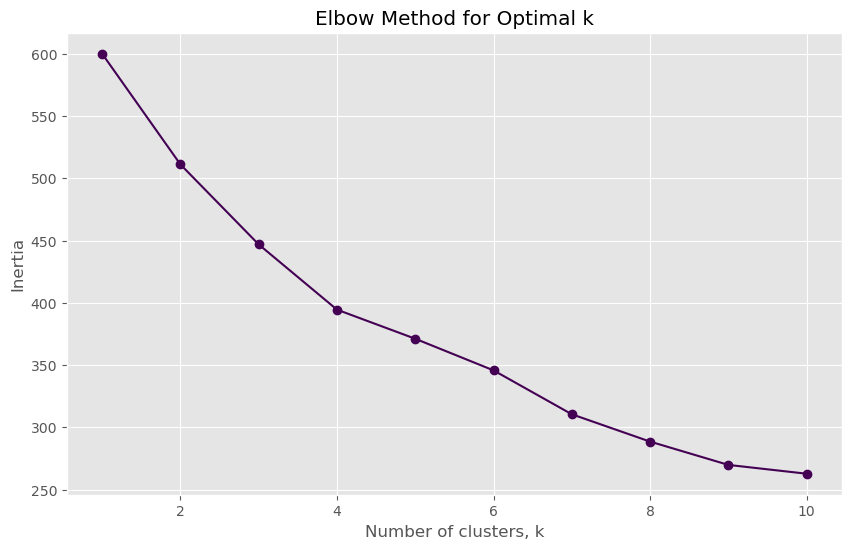

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.show()

In [129]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

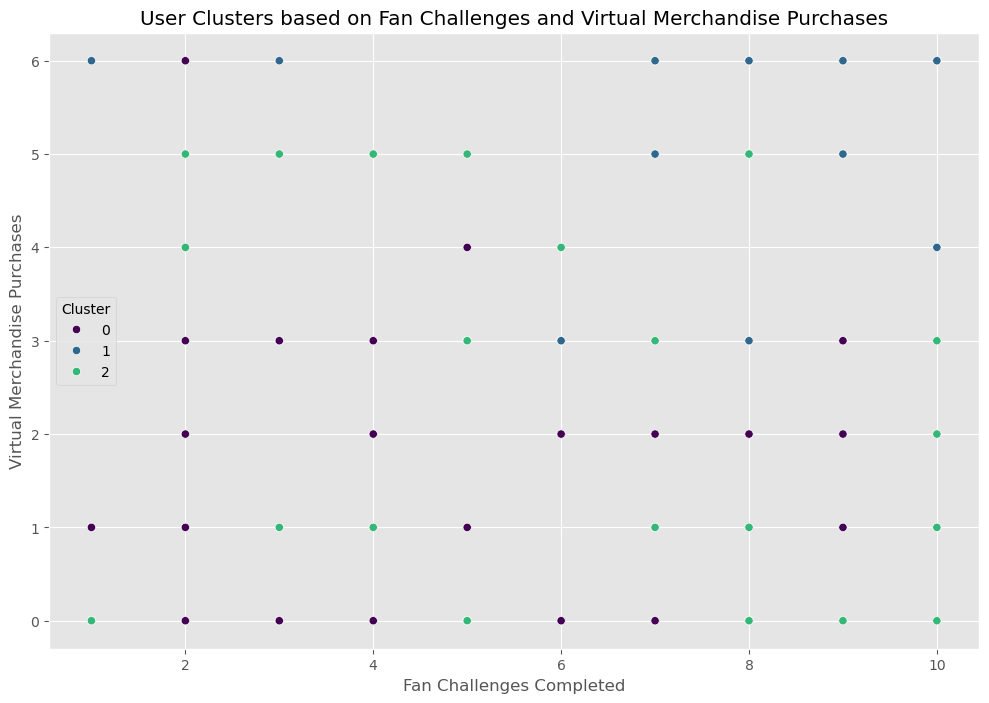

In [130]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Fan Challenges Completed', y='Virtual Merchandise Purchases', hue='Cluster', data=df, palette=colors[:3])
plt.title('User Clusters based on Fan Challenges and Virtual Merchandise Purchases')
plt.show()

Prediction Modeling and Analysis using Random Forest

In [132]:
df['will_purchase'] = (df['Virtual Merchandise Purchases'] > 0).astype(int)
features = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)', 
            'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']
X = df[features]
y = df['will_purchase']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.89      0.89      0.89        18

    accuracy                           0.80        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.80      0.80      0.80        20



Identifying Key features for accurate predictions

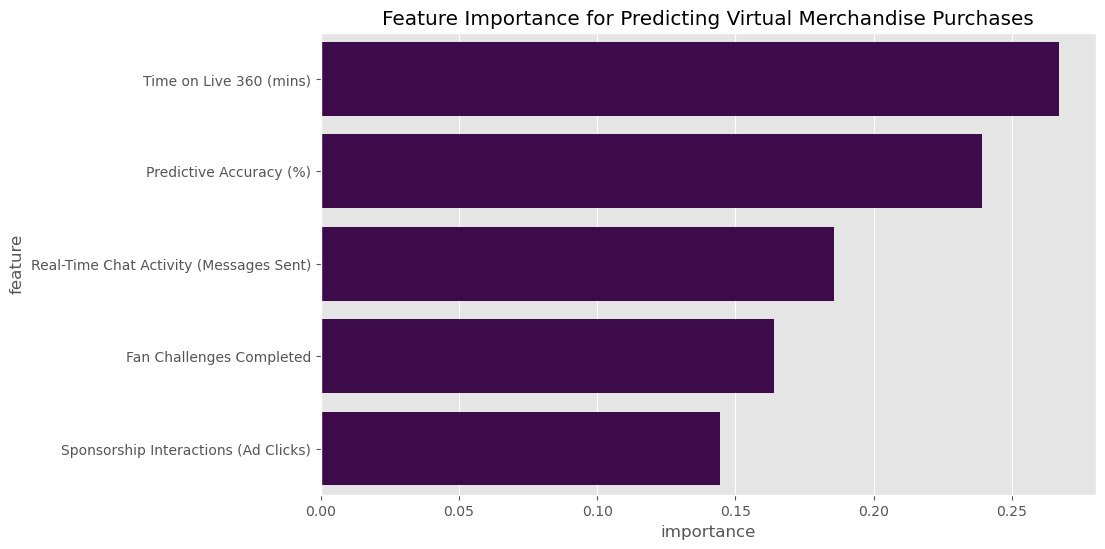

In [135]:
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Predicting Virtual Merchandise Purchases')
plt.show()


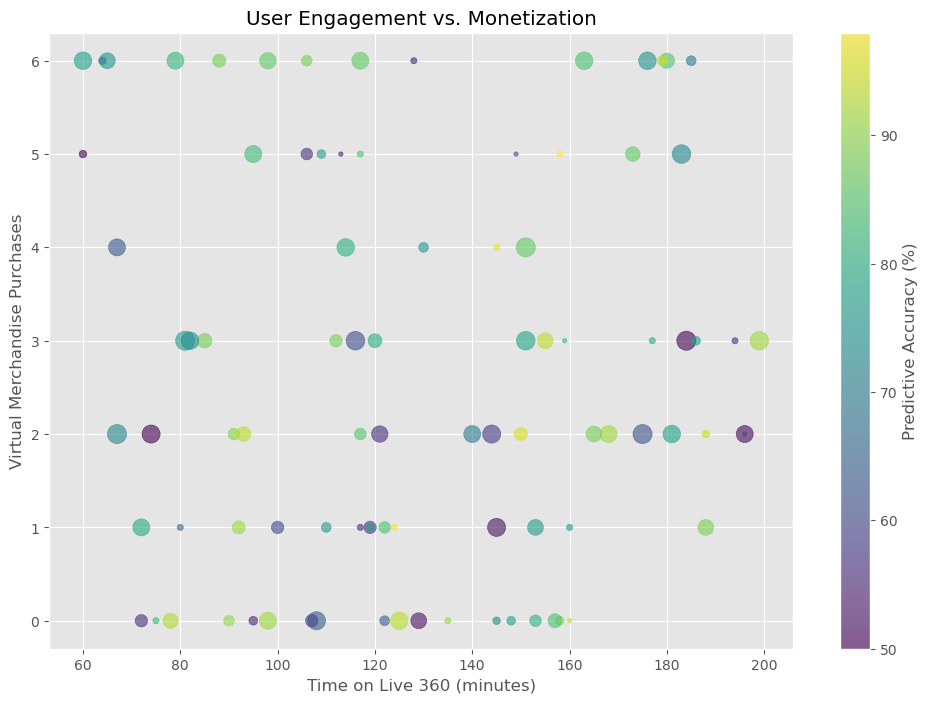

In [136]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Time on Live 360 (mins)'], df['Virtual Merchandise Purchases'], 
                      c=df['Predictive Accuracy (%)'], s=df['Sponsorship Interactions (Ad Clicks)']*10, 
                      cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Predictive Accuracy (%)')
plt.title('User Engagement vs. Monetization')
plt.xlabel('Time on Live 360 (minutes)')
plt.ylabel('Virtual Merchandise Purchases')
plt.show()

# Proposed New Fan Challenge: Race Strategy Simulator

- **Users can create and test different race strategies for autonomous vehicles.**
- **Adjust parameters like:**
  - Energy management
  - Pit stop timing
  - Racing line choices
- **Integrate with Live 360 coverage for real-time strategy adjustments during races.**
- **Award points based on:**
  - Accuracy of predictions
  - Effectiveness of strategies
- **Offer virtual merchandise rewards for top performers.**


# Predicted Outcomes

1. **Increased user engagement:** Estimated increase in time spent on Live 360 coverage.
2. **Higher merchandise sales:** Projected boost in virtual merchandise purchases.
3. **Improved predictive accuracy:** Expected increase in overall user prediction accuracy.
4. **Enhanced sponsorship opportunities:** New ad placement options within the simulator and during Live 360 coverage.
